<a href="https://colab.research.google.com/github/rvtovar/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRuRgiZaLcdq_937t8Psne-9AWR5VwSQYnt6PgMdDPFaVdOeP4xxA9h7_2mAYEsh8DOYzoh0XAqeQa0/pub?gid=2071196080&single=true&output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# how many rows and columns (8523 rows, 12 columns)
df.shape


(8523, 12)

In [4]:
#data types of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#testing for duplicates
df.duplicated().sum()

# no duplicates found

0

In [6]:
#missing data 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
#filling in missing item_weights with the average item weight, there are a significant amount missing so i felt like the best courese of action was to use the mean

weight_mean = df["Item_Weight"].mean()
df['Item_Weight'].fillna(weight_mean, inplace=True)

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# As for outlet size we are going to use the most common one found, to substitute the data that is missing

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
#fixing inconsistencies in Item Fat Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', "Regular")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
# now looking at item types
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
#looking at outlet_location_Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
#Looking at Outlet_type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
# Now looking at summmary Statistics

df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.86,4.23,4.56,9.31,12.86,16.00,21.35
Item_Visibility,8523.0,0.07,0.05,0.00,0.03,0.05,0.09,0.33
Item_MRP,8523.0,140.99,62.28,31.29,93.83,143.01,185.64,266.89
Outlet_Establishment_Year,8523.0,1997.83,8.37,1985.00,1987.00,1999.00,2004.00,2009.00
Item_Outlet_Sales,8523.0,2181.29,1706.50,33.29,834.25,1794.33,3101.30,13086.96


### In the following we are going to create histograms to view distrubtions of features

Text(0.5, 0, 'Item Weight')

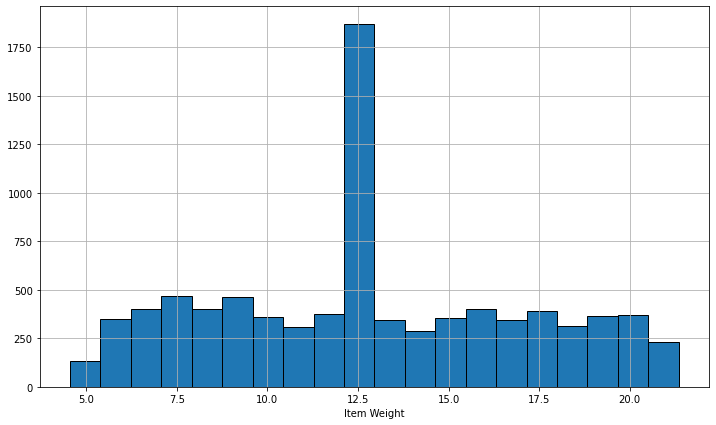

In [34]:
# The distrubtion of item weights, the large amount of 12.5 weights comes from replacing data that was missing
plt.figure(figsize=(12,7))
df["Item_Weight"].hist(edgecolor='black', bins=20)
plt.xlabel("Item Weight")

Text(0.5, 0, 'Item Visibility')

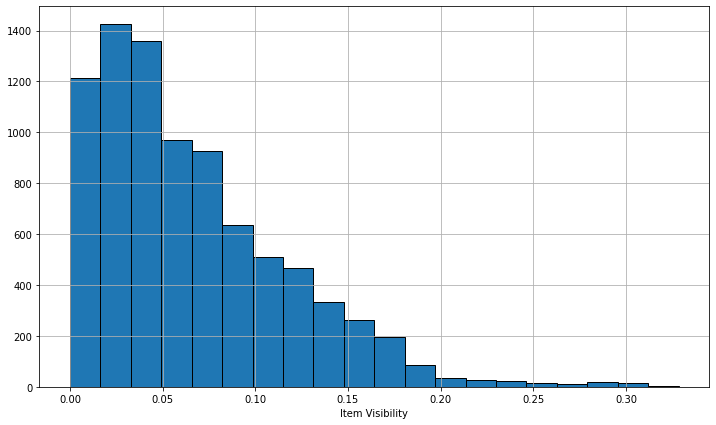

In [37]:
# item Visibility
plt.figure(figsize=(12,7))
df["Item_Visibility"].hist(edgecolor='black', bins=20)
plt.xlabel("Item Visibility")

Text(0.5, 0, 'Item MRP')

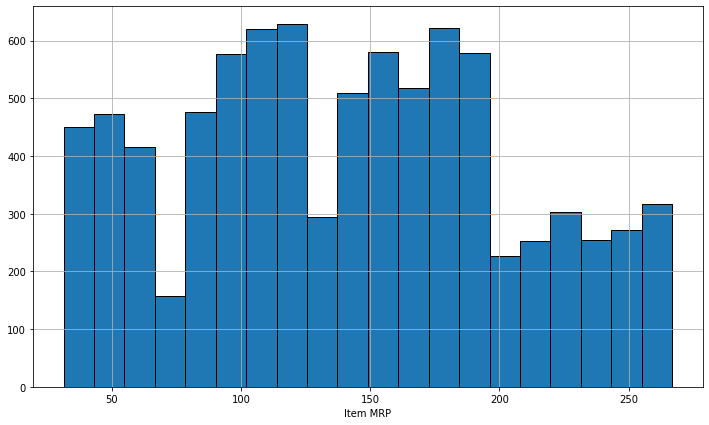

In [40]:
#item mrp
plt.figure(figsize=(12,7))
df["Item_MRP"].hist(edgecolor='black', bins=20)
plt.xlabel("Item MRP")

### Box Plots to view Statiscal Summaries

Text(0, 0.5, 'Item Outlet Sales')

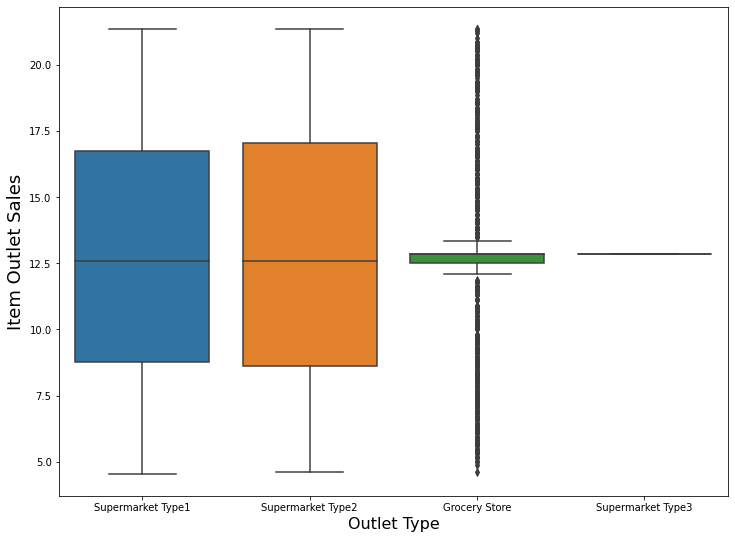

In [70]:
# Box plot of item outlet sales and Item Type

plt.figure(figsize=(12,9))
sns.boxplot(data=df, x="Outlet_Type", y="Item_Weight", hue="Low_Fat_Content")
plt.xlabel("Outlet Type", fontsize=16)
plt.ylabel("Item Outlet Sales", fontsize=18)

Text(0, 0.5, 'Item Outlet Sales')

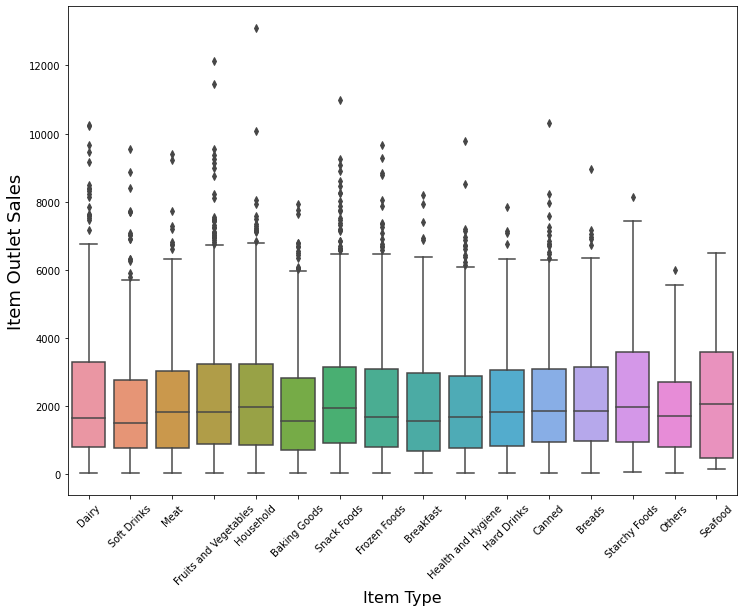

In [63]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales")
plt.xticks(rotation=45)
plt.xlabel("Item Type", fontsize=16)
plt.ylabel("Item Outlet Sales", fontsize=18)

Text(0, 0.5, 'Item Visibility')

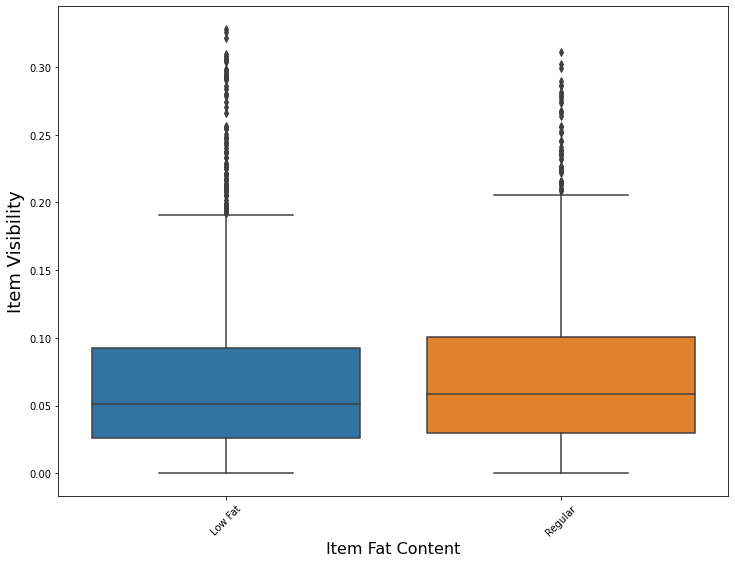

In [67]:
# Item Fat Content vs Item Visibility

plt.figure(figsize=(12,9))
sns.boxplot(data=df, x="Item_Fat_Content", y="Item_Visibility")
plt.xticks(rotation=45)
plt.xlabel("Item Fat Content", fontsize=16)
plt.ylabel("Item Visibility", fontsize=18)

### Correlation Heatmap

In [74]:
corr = df.corr()

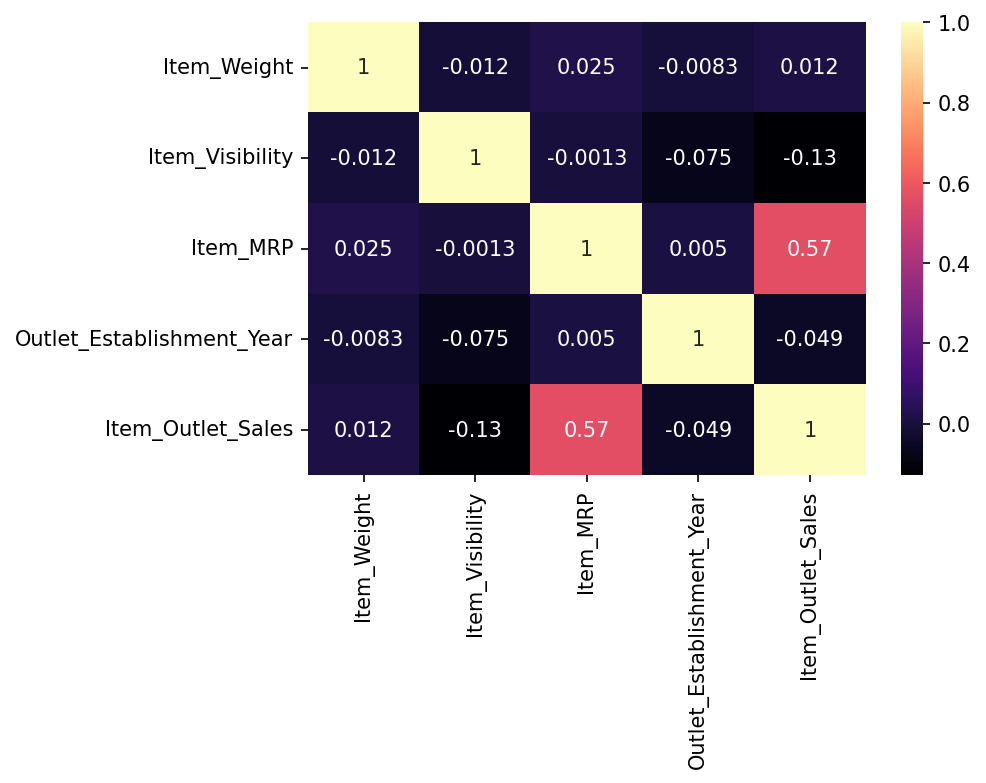

In [79]:
plt.figure(dpi=150)
sns.heatmap(corr, annot=True, cmap='magma')